In [1]:
n_runs = 10
threads = [2,4,8,16,32]
types = ["consumer", "strong_obs", "weak_obs"]

In [35]:
data = {}
for r in range(n_runs):
    for n in threads:
        for t in types:
            k = t
            if k not in data:
                data[k] = []
            with open(f"oqscaling_run_{r}_nthreads_{n}_bench_{t}.log") as f:
                for line in [l for l in f.readlines() if l.startswith("[producer") and "sent" in l]:
                    v = line.split()[-1]
                    if v.endswith("ms"):
                        v = float(v[:-2])
                    else:
                        v = 1000 * float(v[:-1])
                    v = 1024 * 1024 / v
                    v /= 1000
                    data[k].append((n, v))
print(data)

{'consumer': [(2, 12.336521176230333), (4, 2.864687396113091), (4, 2.863719152725783), (4, 2.8634385870720225), (8, 1.3380810290309857), (8, 1.3373892041077309), (8, 1.337213493873377), (8, 1.3370379167512576), (8, 1.3369636147607002), (8, 1.337105548373652), (8, 1.336991004188144), (16, 0.5720609251301046), (16, 0.5718506290093511), (16, 0.5717371339661675), (16, 0.5716651067264712), (16, 0.5716179424874327), (16, 0.5715834315501602), (16, 0.571557678737132), (16, 0.5715178228132489), (16, 0.5714906889255355), (16, 0.5714583762007319), (16, 0.5714639646691375), (16, 0.5715354474683766), (16, 0.5714710335655286), (16, 0.5715028210005285), (16, 0.5714804849877952), (32, 0.2956481777008764), (32, 0.29560544258182964), (32, 0.2955642160784459), (32, 0.2955722233422224), (32, 0.29555184587126376), (32, 0.2955580759149415), (32, 0.2955468297044466), (32, 0.29551234175360896), (32, 0.295505669347549), (32, 0.29551240887894514), (32, 0.2955123081909523), (32, 0.2955465034962264), (32, 0.29554

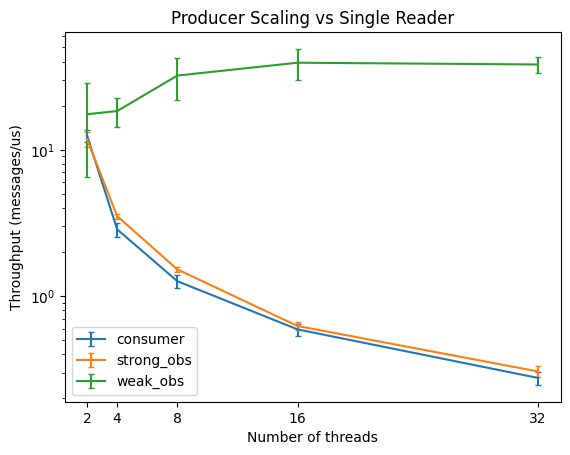

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def get_plot(key: str):
    data_k = data[key]
    per_thread_data = {}
    for (n, v) in data_k:
        if n not in per_thread_data:
            per_thread_data[n] = []
        per_thread_data[n].append(v)
    x = threads
    y = [np.mean(per_thread_data[n]) for n in x]
    y_err = [np.std(per_thread_data[n]) for n in x]
    plt.errorbar(x, y, yerr=y_err, capsize=2, label=key)

plt.figure()
plt.xlabel("Number of threads")
plt.ylabel("Throughput (messages/us)")
plt.title("Producer Scaling vs Single Reader")
plt.yscale("log")
plt.xticks(threads)
for t in types:
    get_plot(t)
plt.legend()
plt.savefig("oqscaling.png")
plt.show()